In [2]:
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
os.chdir("C:/Users/heber/Documents/GSLIB_FOLDER")         # ruta de ejecutables de GSLIB

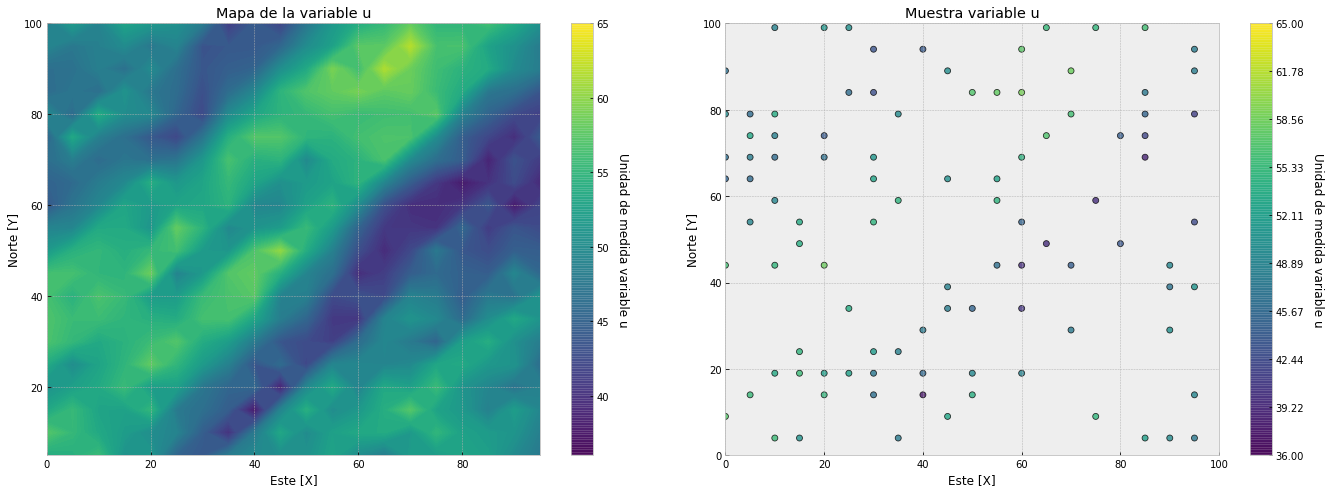

In [25]:
nx = 20; ny = 20; cell_size=5                            # Grilla para la simulación
xmin = 0; ymin =0;                                         # coordenadas de origen
xmax = 100; ymax = 100                                     # coordenadas finales
seed = 454                                             #semilla generación de numeros aleatorios
cmap = plt.cm.viridis                                        # mapa de colores para la simulación 

va_mean = 50; va_stdev = 5; va_cmin = 36; va_cmax =65   #media, desviación estandar
var = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1,azi1=45,hmaj1=100,hmin1=20)
VA = GSLIB.sgsim_uncond(1,nx,ny,cell_size,seed,var,"u")
VA = GSLIB.affine(VA,va_mean,va_stdev)

# Extracción de una muestra desde la variable "u" simulada.
mx = 100; my =100
sample_data1 = GSLIB.regular_sample(VA,xmin,xmax,ymin,ymax,cell_size,mx,my,nx,ny,"u")
nsamp_random = 100
sample_data2 = GSLIB.random_sample(VA,xmin,xmax,ymin,ymax,cell_size,nsamp_random,'u')
sample_data = pd.concat([sample_data1,sample_data2],ignore_index = True)

plt.subplot(121)
GSLIB.pixelplt_st(VA,xmin,xmax,ymin,ymax,cell_size,va_cmin,va_cmax,"Mapa de la variable u","Este [X]","Norte [Y]","Unidad de medida variable u",cmap)
plt.subplot(122)
GSLIB.locmap_st(sample_data,'X','Y','u',xmin,xmax,ymin,ymax,va_cmin,va_cmax,'Muestra variable u','Este [X]','Norte [Y]','Unidad de medida variable u',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.1)
plt.show()

In [26]:
sample_data.to_excel("C:/Users/heber/Desktop/ADEP/unidad_5/puntos_tarea_2d.xlsx")